`Project`: **CIFAR10 Image classification using CNN**

`Author`: **Ashita Chandnani** ECE 697


# Imports

In [ ]:
import sys, os
sys.version

'3.6.9 (default, Oct  8 2020, 12:12:24) \n[GCC 8.4.0]'

In [ ]:
from tensorflow.compat.v1 import InteractiveSession
import tensorflow as tf
from tensorflow.python.client import device_lib
import numpy as np
from keras import datasets, layers, models
import IPython
import sys, pickle, os, gzip
import IPython.display as display
from keras.utils import to_categorical
from keras import regularizers
import keras, warnings
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization

In [ ]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14741379600631508240, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5355223858584989463
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13510660108226718898
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15695549568
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5120367510166440426
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
print('TF version:{}, Keras version:{}'.format(tf.__version__, keras.__version__))

TF version:2.3.0, Keras version:2.4.3


# Load the data
* The CIFAR-10 dataset comprises of 60000 32x32 colour images in 10 classes, with 6000 images per class.
* There are 50000 training images and 10000 test images.

* The test batch contains exactly 1000 randomly-selected images from each class.

In [ ]:

(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

train_x = train_x.reshape((50000, 32, 32, 3)).astype("float32")
test_x = test_x.reshape((10000, 32, 32, 3)).astype("float32")

print(train_x.shape)
print(test_x.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


##  Normalize pixel values to be between 0 and 1

In [ ]:
train_x, test_x = train_x / 255, test_x / 255
print(train_x.shape)
print(test_x.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## One hot vectorize labels

In [ ]:
train_y = to_categorical(train_y)
print('train_y.shape:{}'.format(train_y.shape))

test_y = to_categorical(test_y)
print('test_y.shape:{}'.format(test_y.shape))

print(train_y[0])


train_y.shape:(50000, 10)
test_y.shape:(10000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Set up CNN
* A simple convolutional neural network with the structure 128 256 256 512 512
* Adam optimizer and Cross Entropy Loss with a learning rate ( 𝛼 ) set to 0.005.

In [ ]:
eta = 0.0001
val_frac = 0.1 #Fraction of training data to be used for validation
# FIRST CONVOLUTION LAYER
nC1_kernels = 128 ##number of kernels in the first convolutional layer
C1_kernel_shape = (3, 3) ## size of the kernel in the first convolutional layer (5,5)
C1_stride = (1,1) ## stride of the convolution 1 pixel right and 1 pixel down
C1_activation = 'relu' ## activation function of the C1 neurons
P1_kernel_shape = (2, 2) ## Size of the pooling window (2,2)
P1_stride = 2 ## stride of the pooling window

# SECOND CONVOLUTION LAYER
nC2_kernels = 256
C2_kernel_shape = (3, 3)
C2_stride = 1
C2_activation = 'relu'
P2_kernel_shape = (2, 2)
P2_stride = 2

# THIRD CONVOLUTION LAYER
nC3_kernels = 256
C3_kernel_shape = (3, 3)
C3_stride = 1
C3_activation = 'relu'
P3_kernel_shape = (2, 2)
P3_stride = 2

# FOURTH CONVOLUTION LAYER
nC4_kernels = 512
C4_kernel_shape = (3, 3)
C4_stride = 1
C4_activation = 'relu'
P4_kernel_shape = (2, 2)
P4_stride = 2

# FIFTH CONVOLUTION LAYER
nC5_kernels = 512
C5_kernel_shape = (3, 3)
C5_stride = 1
C5_activation = 'relu'
P5_kernel_shape = (2, 2)
P5_stride = 2

# FULLY CONNECTED LAYER
n_dense1 = 1024
dense_activation1 = 'relu'

# FULLY CONNECTED LAYER
n_dense2 = 1024
dense_activation2 = 'relu'

# FINAL LAYER
last_activation = 'softmax'
cost_function = 'categorical_crossentropy'
n_out = 10
optimizer = 'adam' #'sgd'

In [ ]:
model = tf.keras.Sequential()

#FIRST CONVOLUTION LAYER
model.add(tf.keras.layers.Conv2D(nC1_kernels, C1_kernel_shape, C1_stride, activation=C1_activation,
                               padding="same", input_shape=(32, 32, 3)))

#model.add(tf.keras.layers.MaxPooling2D(P1_kernel_shape, P1_stride))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

#SECOND CONVOLUTION LAYER
model.add(tf.keras.layers.Conv2D(nC2_kernels, C2_kernel_shape, C2_stride, activation=C2_activation, padding="same"))
model.add(tf.keras.layers.MaxPooling2D(P2_kernel_shape, P2_stride))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

#THIRD CONVOLUTION LAYER
model.add(tf.keras.layers.Conv2D(nC3_kernels, C3_kernel_shape, C3_stride, activation=C3_activation,padding="same"))
model.add(tf.keras.layers.MaxPooling2D(P3_kernel_shape, P3_stride))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

#FOURTH CONVOLUTION LAYER
model.add(tf.keras.layers.Conv2D(nC4_kernels, C4_kernel_shape, C4_stride, activation=C4_activation,padding="same"))
model.add(tf.keras.layers.MaxPooling2D(P4_kernel_shape, P4_stride))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

#FIFTH CONVOLUTION LAYER
model.add(tf.keras.layers.Conv2D(nC5_kernels, C5_kernel_shape, C5_stride, activation=C5_activation,padding="same"))
model.add(tf.keras.layers.MaxPooling2D(P5_kernel_shape, P5_stride))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

# The 64 pooled maps are 5x5
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

#FULLY CONNECTED LAYERS
model.add(tf.keras.layers.Dense(n_dense1,kernel_regularizer=regularizers.l2(0.00001),
                                kernel_initializer='glorot_normal', activation=dense_activation1))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(n_dense2,kernel_regularizer=regularizers.l2(0.00001),
                                kernel_initializer='glorot_normal', activation=dense_activation2))


model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(n_out, kernel_regularizer=regularizers.l2(0.00001),kernel_initializer='glorot_normal', activation=last_activation))


#COMPILE THE MODEL
if(optimizer=='adam'):
    optim = tf.keras.optimizers.Adam(lr=eta)
else:
    optim = tf.keras.optimizers.SGD(lr=eta)

model.compile(optimizer=optim, loss=cost_function, metrics=['accuracy'])
print(model.summary())

#CALLBACK TO KERAS TO SAVE BEST MODEL WEIGHTS
best_weights="cnn_weights_best.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(best_weights, monitor='val_accuracy', verbose=1, save_best_only=True,
                                                mode='max')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 256)       1

## Train the CNN

In [ ]:

mini_batch_size = 32
trained_model = model.fit(train_x,train_y, epochs=25, batch_size=mini_batch_size, callbacks=[checkpoint],
                    validation_split=val_frac,verbose=0,shuffle=True)


Epoch 00001: val_accuracy improved from -inf to 0.27480, saving model to cnn_weights_best.hdf5

Epoch 00002: val_accuracy improved from 0.27480 to 0.47720, saving model to cnn_weights_best.hdf5

Epoch 00003: val_accuracy improved from 0.47720 to 0.60500, saving model to cnn_weights_best.hdf5

Epoch 00004: val_accuracy improved from 0.60500 to 0.69960, saving model to cnn_weights_best.hdf5

Epoch 00005: val_accuracy improved from 0.69960 to 0.74360, saving model to cnn_weights_best.hdf5

Epoch 00006: val_accuracy improved from 0.74360 to 0.76300, saving model to cnn_weights_best.hdf5

Epoch 00007: val_accuracy improved from 0.76300 to 0.79620, saving model to cnn_weights_best.hdf5

Epoch 00008: val_accuracy improved from 0.79620 to 0.79980, saving model to cnn_weights_best.hdf5

Epoch 00009: val_accuracy improved from 0.79980 to 0.80520, saving model to cnn_weights_best.hdf5

Epoch 00010: val_accuracy improved from 0.80520 to 0.82420, saving model to cnn_weights_best.hdf5

Epoch 00011:

# Test the model at the end

In [ ]:
model.evaluate(test_x, test_y, batch_size=5000)

2/2 [==============================] - 0s 243ms/step - loss: 0.5092 - accuracy: 0.8653


[0.5092214941978455, 0.8652999997138977]

In [ ]:
model.load_weights(best_weights)
model.compile(optimizer=optim, loss=cost_function, metrics=['accuracy'])
model.evaluate(test_x, test_y, batch_size=5000)

2/2 [==============================] - 1s 443ms/step - loss: 0.5092 - accuracy: 0.8653


[0.5092214941978455, 0.8652999997138977]

0.9527111053466797
0.8741999864578247


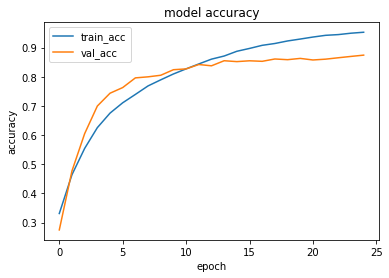

In [ ]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')

print(np.max(trained_model.history['accuracy']))
print(np.max(trained_model.history['val_accuracy']))

0.16519895195960999
0.4527044892311096


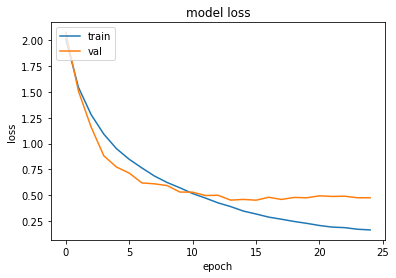

In [ ]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

print(np.min(trained_model.history['loss']))
print(np.min(trained_model.history['val_loss']))

**Plot weights of Kernels**

In [ ]:
print("model.layers is a list of 7 objects")
print(type(model.layers),len(model.layers))
print("")
print("These 7 objects are:")
print("(1) weights & biases of Conv1")
print("(2) weights & biases of Pool1")
print("(3) weights & biases of Conv2")
print("(4) weights & biases of Pool2")
print("(5) weights & biases of the flatten layer")
print("(6) weights & biases of the first dense layer")
print("(7) weights & biases of the (dense) ouput layer")
print("")
print("Kernal Weights from input to feature map 1 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,0])
print('')
print("Kernal Weights from input to feature map 2 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,1])
print('')
print("Kernal Weights from input to feature map 3 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,2])
print('')
print("Kernal Weights from input to feature map 4 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,3])
print('')
print("Kernal Weights from input to feature map 5 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,4])
print('')
print("Kernal Weights from input to feature map 6 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,5])
print('')
print("Kernal Weights from input to feature map 7 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,6])
print('')
print("Kernal Weights from input to feature map 8 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,7])
print('')
print("Kernal Weights from input to feature map 9 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,8])  # 5x5x1   5x5x3
print('')
print("Kernal Weights from input to feature map 10 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,9])  # 5x5x1   5x5x3
print('')
print("Kernal Weights from input to feature map 11 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,10])  # 5x5x1   5x5x3
print('')
print("Kernal Weights from input to feature map 12 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,11])  # 5x5x1   5x5x3
print('')
print("Kernal Weights from input to feature map 13 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,12])  # 5x5x1   5x5x3
print('')
print("Kernal Weights from input to feature map 14 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,13])  # 5x5x1   5x5x3
print('')
print("Kernal Weights from input to feature map 15 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,14])
print('')
print("Kernal Weights from input to feature map 16 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,15])
print('')
print("Kernal Weights from input to feature map 17 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,16])
print('')
print("Kernal Weights from input to feature map 18 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,17])
print('')
print("Kernal Weights from input to feature map 19 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,18])
print('')
print("Kernal Weights from input to feature map 20 of Conv1")
print('')
print(model.layers[0].get_weights()[0][:,:,0,19])
print('')
print("Biases of all 128 maps of the first convolutional layer")
print('')
print(model.layers[0].get_weights()[1])
print("")
print("Kernal Weights from Conv1 layer to the Pool1 layer")
print('')
print(model.layers[1].get_weights())
print('')
print("Bias of all 32 maps of the Pool1 layer")
print('')
print(model.layers[1].get_weights())



model.layers is a list of 7 objects
<class 'list'> 29

These 7 objects are:
(1) weights & biases of Conv1
(2) weights & biases of Pool1
(3) weights & biases of Conv2
(4) weights & biases of Pool2
(5) weights & biases of the flatten layer
(6) weights & biases of the first dense layer
(7) weights & biases of the (dense) ouput layer

Kernal Weights from input to feature map 1 of Conv1

[[-0.03125853  0.00834867 -0.00585765]
 [ 0.04419725 -0.00745635  0.00334662]
 [ 0.04080281  0.03652125  0.011704  ]]

Kernal Weights from input to feature map 2 of Conv1

[[-0.03483864  0.04990203  0.0027793 ]
 [ 0.04020449 -0.01929627 -0.01231721]
 [ 0.03437578  0.04415894 -0.00814299]]

Kernal Weights from input to feature map 3 of Conv1

[[ 0.03506618  0.02435937  0.01167815]
 [-0.01442595 -0.05721055 -0.04246827]
 [-0.07047289  0.05681028 -0.04782699]]

Kernal Weights from input to feature map 4 of Conv1

[[ 0.0022211   0.0352364   0.06065395]
 [-0.07180813 -0.00279991  0.03300504]
 [-0.03354561 -0.058

In [ ]:
#Conv1
conv1_kernels = model.layers[0].get_weights()[0]
print('conv1_kernels.shape:{}'.format(conv1_kernels.shape))
conv1_biases = model.layers[0].get_weights()[1]
print('conv1_biases.shape:{}\n'.format(conv1_biases.shape))



conv1_kernels.shape:(3, 3, 3, 128)
conv1_biases.shape:(128,)



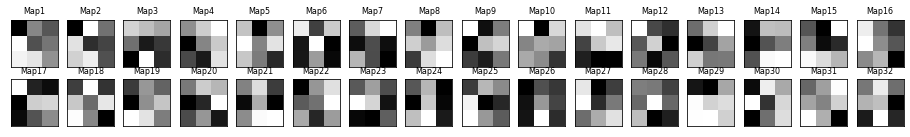

In [ ]:
## First channel
fig, axes = plt.subplots(2, 16, figsize=(16,2), subplot_kw={'xticks': [], 'yticks': []})
#fig.subplots_adjust(left=0.12, bottom=0.5, right=0.89, top=0.9, wspace=0.1, hspace=0.21)
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(conv1_kernels[:,:,0,i], cmap='gray')
    axes[i].set_title('Map'+str(i+1), fontsize=8)
#plt.suptitle('Conv1 Kernels')
plt.show()
# imshow normalizes the kernel weights to between 0 and 1, then converts them to grayscale 0 to 255
# black is 0 and white is 255

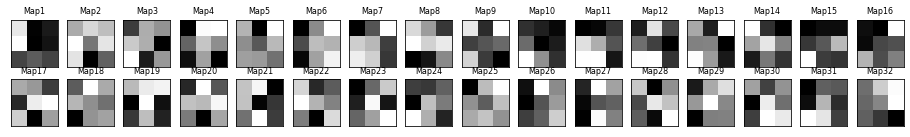

In [ ]:
## second channel
fig, axes = plt.subplots(2, 16, figsize=(16,2), subplot_kw={'xticks': [], 'yticks': []})
#fig.subplots_adjust(left=0.12, bottom=0.5, right=0.89, top=0.9, wspace=0.1, hspace=0.21)
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(conv1_kernels[:,:,1,i], cmap='gray')
    axes[i].set_title('Map'+str(i+1), fontsize=8)
#plt.suptitle('Conv1 Kernels')
plt.show()
# imshow normalizes the kernel weights to between 0 and 1, then converts them to grayscale 0 to 255
# black is 0 and white is 255

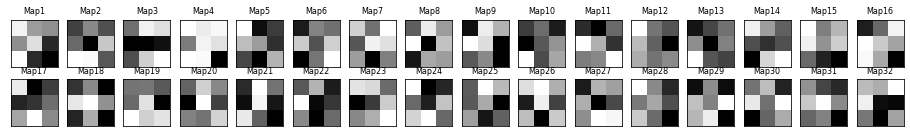

In [ ]:
## third channel
fig, axes = plt.subplots(2, 16, figsize=(16,2), subplot_kw={'xticks': [], 'yticks': []})
#fig.subplots_adjust(left=0.12, bottom=0.5, right=0.89, top=0.9, wspace=0.1, hspace=0.21)
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(conv1_kernels[:,:,2,i], cmap='gray')
    axes[i].set_title('Map'+str(i+1), fontsize=8)
#plt.suptitle('Conv1 Kernels')
plt.show()
# imshow normalizes the kernel weights to between 0 and 1, then converts them to grayscale 0 to 255
# black is 0 and white is 255

In [ ]:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

image_placeholder = tf.placeholder(tf.float32, shape=[1,32,32,1])
kernel_placeholder = tf.placeholder(tf.float32, shape=[3,3,1,1])
# 3x3 kernel with 1 input channels and 1 output channel/map
conv_strides_1d = [1, 1, 1, 1]
inter = tf.squeeze(tf.nn.conv2d(image_placeholder,kernel_placeholder,strides=conv_strides_1d,padding='VALID'))
sess= tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

Instructions for updating:
non-resource variables are not supported in the long term


train_x[1,:,:,0].shape is (32, 32)


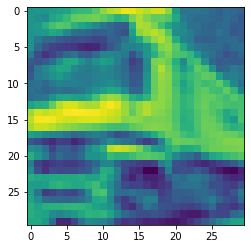

In [ ]:



# Call the frst kernel of C1
K1=conv1_kernels[:,:,0,0]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K1.reshape(3,3,1,1)
result1 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result1)







train_x[1,:,:,0].shape is (32, 32)


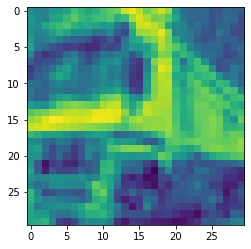

In [ ]:
#  C2
K2=conv1_kernels[:,:,0,1]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


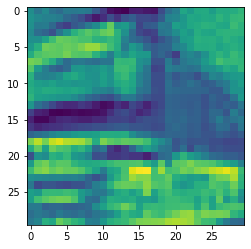

In [ ]:
#  C3
K2=conv1_kernels[:,:,0,2]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


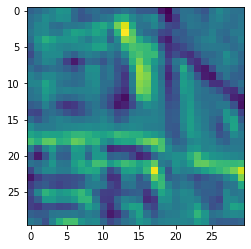

In [ ]:
#  C4
K2=conv1_kernels[:,:,0,3]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


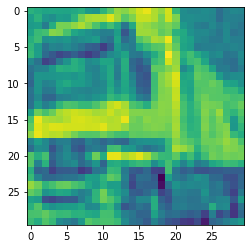

In [ ]:
#  C5
K2=conv1_kernels[:,:,0,4]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


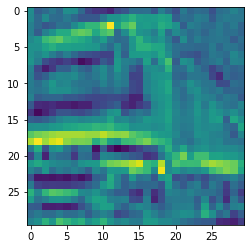

In [ ]:
#  C6
K2=conv1_kernels[:,:,0,5]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


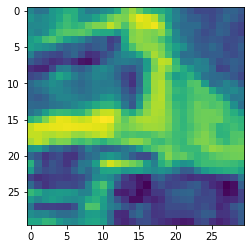

In [ ]:
#  C7
K2=conv1_kernels[:,:,0,6]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


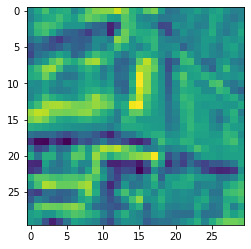

In [ ]:
#  C8
K2=conv1_kernels[:,:,0,7]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


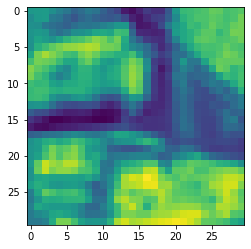

In [ ]:
#  C9
K2=conv1_kernels[:,:,0,8]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


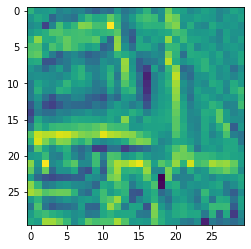

In [ ]:
#  C10
K2=conv1_kernels[:,:,0,9]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


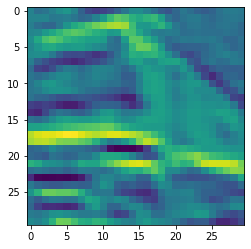

In [ ]:
#  C11
K2=conv1_kernels[:,:,0,10]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


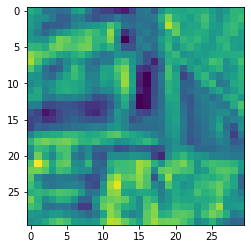

In [ ]:
#  C12
K2=conv1_kernels[:,:,0,11]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


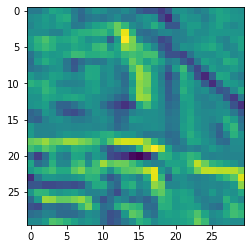

In [ ]:
#  C13
K2=conv1_kernels[:,:,0,12]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


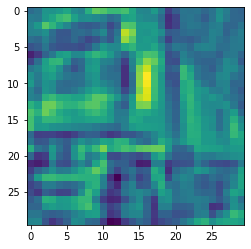

In [ ]:
#  C14
K2=conv1_kernels[:,:,0,13]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


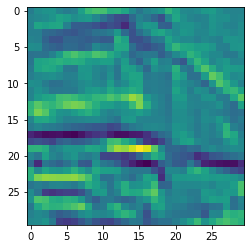

In [ ]:
#  C15
K2=conv1_kernels[:,:,0,14]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


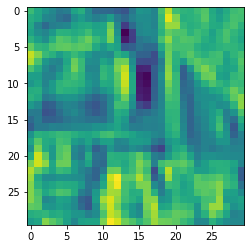

In [ ]:
#  C16
K2=conv1_kernels[:,:,0,15]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


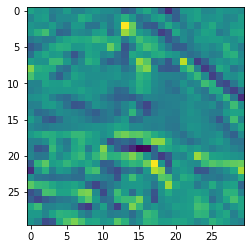

In [ ]:
#  C17
K2=conv1_kernels[:,:,0,16]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


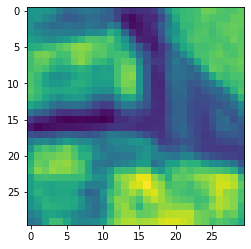

In [ ]:
#  C18
K2=conv1_kernels[:,:,0,17]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


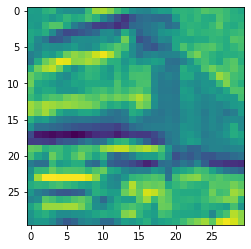

In [ ]:
#  C19
K2=conv1_kernels[:,:,0,18]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

train_x[1,:,:,0].shape is (32, 32)


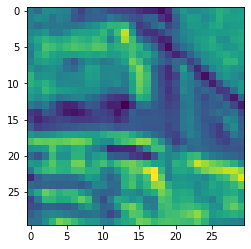

In [ ]:
#  C20
K2=conv1_kernels[:,:,0,19]
print('train_x[1,:,:,0].shape is {}'.format(train_x[1,:,:,0].shape))
image = train_x[1,:,:,0].reshape(1,32,32,1)
kernel = K2.reshape(3,3,1,1)
result2 = sess.run(inter,feed_dict ={image_placeholder:image,kernel_placeholder:kernel})
plt.imshow(result2)

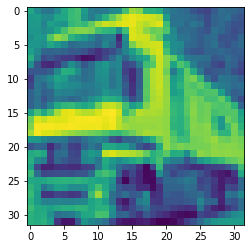

In [ ]:
plt.imshow(train_x[1,:,:,0])

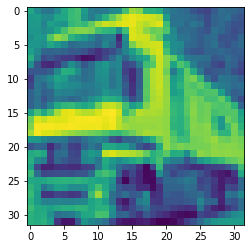

In [ ]:
plt.imshow(train_x[1,:,:,0])